In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('diabetes_data.csv')

# Step 1: Basic Info
print(df.info())
print(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10887 entries, 0 to 10886
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   NCT Number                  10887 non-null  object 
 1   Study Status                10887 non-null  object 
 2   Interventions               10117 non-null  object 
 3   Primary Outcome Measures    10690 non-null  object 
 4   Secondary Outcome Measures  8829 non-null   object 
 5   Other Outcome Measures      1053 non-null   object 
 6   Sponsor                     10887 non-null  object 
 7   Phases                      5065 non-null   object 
 8   Enrollment                  10804 non-null  float64
 9   Start Date                  10834 non-null  object 
 10  Completion Date             10573 non-null  object 
 11  Locations                   9737 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1020.8+ KB
None
         NCT Number Study Status

In [2]:
# Step 2: Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 NCT Number                       0
Study Status                     0
Interventions                  770
Primary Outcome Measures       197
Secondary Outcome Measures    2058
Other Outcome Measures        9834
Sponsor                          0
Phases                        5822
Enrollment                      83
Start Date                      53
Completion Date                314
Locations                     1150
dtype: int64


In [3]:
# Step 3: Unique values in each column
for col in df.columns:
    print(f"Unique values in '{col}': {df[col].nunique()}")


Unique values in 'NCT Number': 10887
Unique values in 'Study Status': 11
Unique values in 'Interventions': 8799
Unique values in 'Primary Outcome Measures': 10455
Unique values in 'Secondary Outcome Measures': 8768
Unique values in 'Other Outcome Measures': 1049
Unique values in 'Sponsor': 2702
Unique values in 'Phases': 7
Unique values in 'Enrollment': 1486
Unique values in 'Start Date': 2814
Unique values in 'Completion Date': 2613
Unique values in 'Locations': 8025


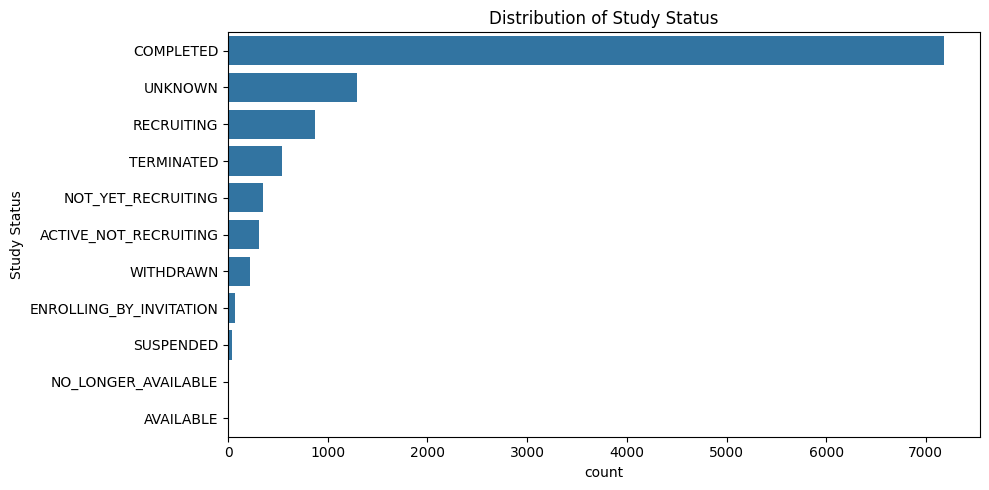

In [4]:
# Step 4: Distribution of Study Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='Study Status', order=df['Study Status'].value_counts().index)
plt.title("Distribution of Study Status")
plt.tight_layout()
plt.show()

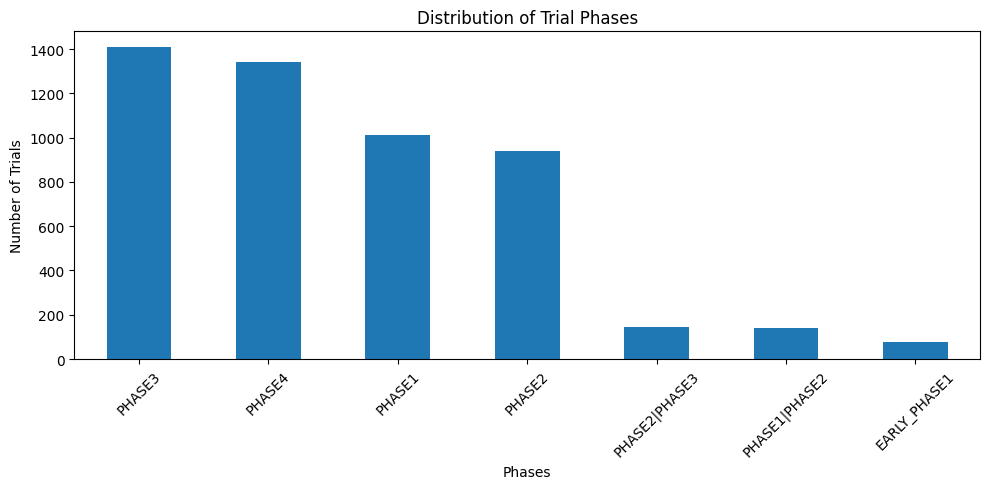

In [5]:
# Step 5: Trial Phases Distribution
plt.figure(figsize=(10, 5))
df['Phases'].value_counts().plot(kind='bar')
plt.title("Distribution of Trial Phases")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

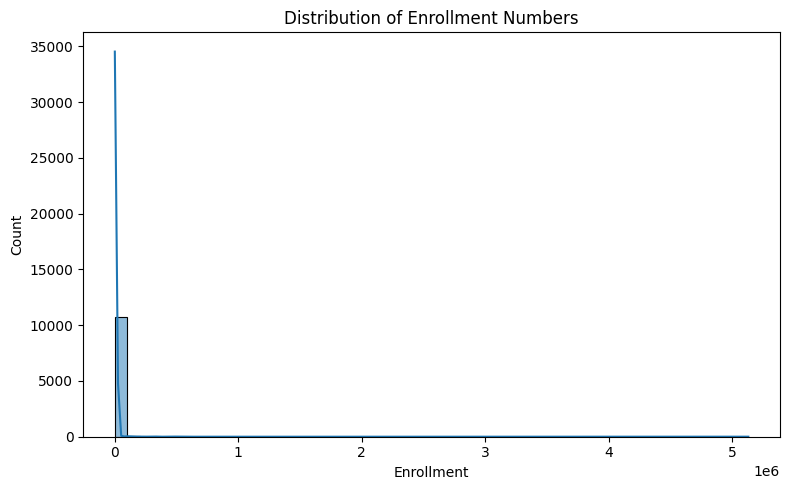

In [6]:
# Step 6: Enrollment stats
plt.figure(figsize=(8, 5))
sns.histplot(df['Enrollment'].dropna(), bins=50, kde=True)
plt.title("Distribution of Enrollment Numbers")
plt.xlabel("Enrollment")
plt.tight_layout()
plt.show()

In [8]:
# Step 7: Start and Completion Dates (converted to datetime)
df['Start Date'] = pd.to_datetime(df['Start Date'], errors='coerce', dayfirst=True)
df['Completion Date'] = pd.to_datetime(df['Completion Date'], errors='coerce', dayfirst=True)

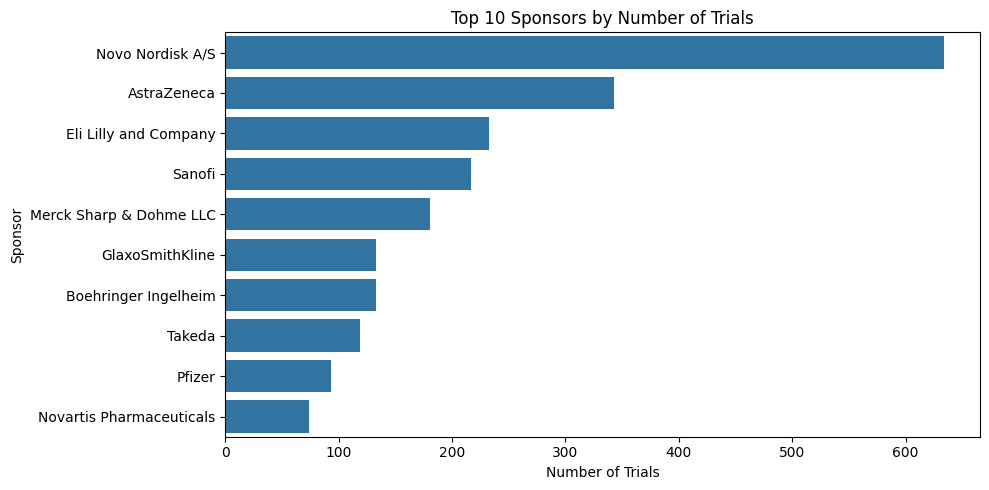

In [9]:
# Step 8: Top Sponsors
top_sponsors = df['Sponsor'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sponsors.values, y=top_sponsors.index)
plt.title("Top 10 Sponsors by Number of Trials")
plt.xlabel("Number of Trials")
plt.tight_layout()
plt.show()
